In [1]:
import numpy as np
from matplotlib import pyplot as plt
# First, import TF and get its version.
import tensorflow as tf
from tensorflow import keras
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

# Check if GPU available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))




OK: TensorFlow >= 2.0.0.
Num GPUs Available:  1


2022-04-09 11:19:41.492500: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 11:19:41.509733: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 11:19:41.509828: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


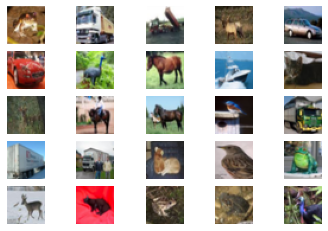

In [2]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k])
            k = k+1
            plt.axis('off')
    plt.show()

    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

show_imgs(X_train)

In [3]:
# No reshaping but still doing some conversion

X_train =  X_train.astype('float32')    # change the type towards float32
X_test =   X_test.astype('float32')     # item
X_train /= 255                          # normalize the range to be between 0.0 and 1.0
X_test /=  255                          # item                     
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
Y_train = keras.utils.to_categorical(y_train, n_classes)    # modify targets to 1-hot using utils.to_categorical()
Y_test = keras.utils.to_categorical(y_test, n_classes)      # idem 
print(Y_train[:10])

50000 train samples
10000 test samples
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [6]:
E = 30
B = 128

model = keras.models.Sequential()

INNER = 3
OUTER = 4

for ii in range(OUTER):
    for jj in range(INNER):

        model.add(keras.layers.Conv2D(64, padding='same',
                                activation='ReLU',
                                kernel_size=(3,3),
                                input_shape=(32,32,3)))

        model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256, activation='ReLU'))

model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 64)       2

In [7]:
tf.keras.backend.clear_session()

model.compile(optimizer='adam', 
            loss='categorical_crossentropy',
            metrics=['accuracy'])

log = model.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/30
391/391 [==============================] - 9s 21ms/step - loss: 1.6688 - accuracy: 0.3923 - val_loss: 2.4589 - val_accuracy: 0.2224
Epoch 2/30
391/391 [==============================] - 8s 20ms/step - loss: 1.1522 - accuracy: 0.5872 - val_loss: 1.1063 - val_accuracy: 0.6013
Epoch 3/30
391/391 [==============================] - 8s 20ms/step - loss: 0.9187 - accuracy: 0.6741 - val_loss: 1.0886 - val_accuracy: 0.6541
Epoch 4/30
391/391 [==============================] - 8s 20ms/step - loss: 0.7804 - accuracy: 0.7271 - val_loss: 0.8474 - val_accuracy: 0.7065
Epoch 5/30
391/391 [==============================] - 8s 20ms/step - loss: 0.6909 - accuracy: 0.7622 - val_loss: 0.7193 - val_accuracy: 0.7486
Epoch 6/30
391/391 [==============================] - 8s 20ms/step - loss: 0.6222 - accuracy: 0.7845 - val_loss: 0.6692 - val_accuracy: 0.7735
Epoch 7/30
391/391 [==============================] - 8s 20ms/step - loss: 0.5676 - accuracy: 0.8055 - val_loss: 0.6037 - val_accuracy: 0.7965

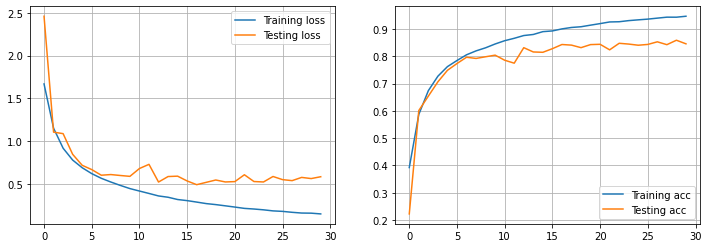

In [8]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()